# Project: Cell Classification

### Objectives:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [55]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import glob
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Opening train file:

In [56]:
# Resizing Dimensions
SIZE_X = 128
SIZE_Y = 128

trainImg = []
trainLabel = []

for path in glob.glob('WT1_2_3_Augmented/'):
    for img_path in glob.glob(os.path.join(path,"*.tif")):
        image = cv2.imread(img_path,-1) # cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, (SIZE_Y, SIZE_X))

        # Extract the label from the file name before the "_"
        cell_stage = os.path.basename(img_path).split("_")[0]

        trainImg.append(image)
        trainLabel.append(cell_stage)

trainImg = np.array(trainImg)
trainImg = trainImg.reshape(trainImg.shape[0],SIZE_X,SIZE_Y,1)

In [57]:
import numpy as np
from keras.utils import to_categorical

# Define the label mapping dictionary
label_mapping = {'stage1': 0, 'stage2': 1, 'stage3': 2, 'stage4': 3, 'stage5': 4}

# Convert string labels to numerical labels using the label_mapping dictionary
numerical_labels = [label_mapping[label] for label in trainLabel]

# Convert the numerical labels to categorical data
trainLabel = to_categorical(numerical_labels, num_classes=5)  # Assuming you have 5 classes

# Now, categorical_labels contains the one-hot encoded labels

In [58]:
print(trainImg.shape)
print(trainLabel.shape)

(1140, 128, 128, 1)
(1140, 5)


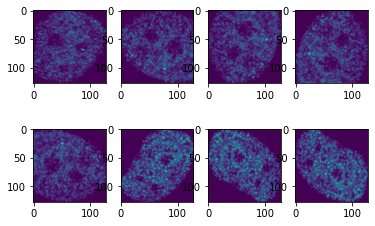

In [59]:
# Show some example images of rotation
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

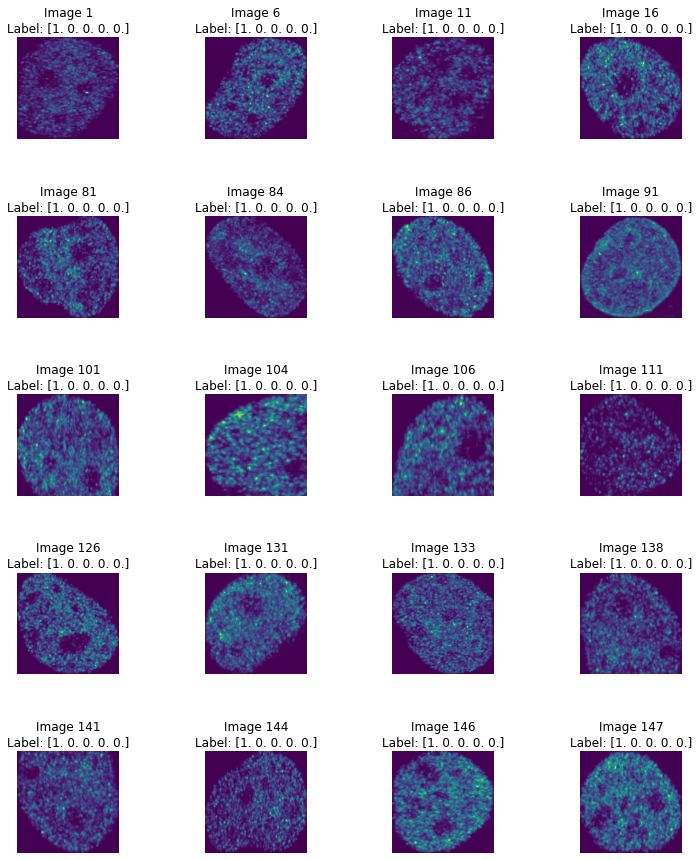

In [60]:
# Create a 5x4 grid of subplots (4 rows and 4 columns)
fig, axes = plt.subplots(5, 4, figsize=(12, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.75, hspace=0.75)

# Specify the indices of the images you want to display
#image_indices = [0, 21, 75, 151, 358, 375, 450, 490, 600, 647, 750, 812, 890, 938, 980, 900, 1104, 1120, 1182, 1221]
image_indices = [0, 5, 10, 15, 80, 83, 85, 90, 100, 103, 105, 110, 125, 130, 132, 137, 140, 143, 145, 146]

# Iterate through the image indices and display images with labels in the grid
for i, idx in enumerate(image_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(trainImg[idx, :, :, 0])  # Use a grayscale colormap
    ax.axis('off')  # Hide axes
    label = trainLabel[idx]  # Get the label for the image at this index
    ax.set_title(f'Image {idx + 1}\nLabel: {label}')

plt.show()

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

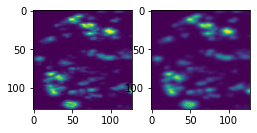

In [61]:
preprocessed_train = []       # Initialize empty list to store the images after pre-processing.

for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_train.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_train = np.asarray(preprocessed_train)    # Convert to numpy array.

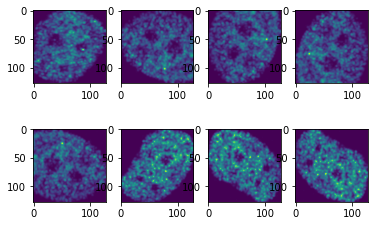

In [62]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_train[i])

In [63]:
# Normalize image data.
preprocessed_train = preprocessed_train / 255

In [64]:
preprocessed_train.shape

(1140, 128, 128)

In [65]:
trainImg = trainImg / 255

In [66]:
trainImg.shape

(1140, 128, 128, 1)

# Make data compatible:

- Reshape data into shapes compatible with Keras models.
- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].

In [67]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(trainLabel)

In [68]:
y[0]

array([1, 0, 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainImg, y, test_size=0.3, random_state=17) #17 #68

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(798, 128, 128, 1)
(798, 5)
(342, 128, 128, 1)
(342, 5)


In [71]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128)
X_test = X_test.reshape(X_test.shape[0], 128, 128)

In [72]:
random_seed = 55
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)
# X_val = X_test
# Y_val = y_test

In [73]:
print(X_test.shape)
print(X_val.shape)

(171, 128, 128)
(171, 128, 128)


# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [74]:
# test model
model= Sequential()
model.add(Conv2D(kernel_size= 3, filters=32, activation='tanh', input_shape=(128,128,1,)))

model.add(Conv2D(filters=30,kernel_size = 3,activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = 3,activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = 3,activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = 3,activation='tanh'))

model.add(Flatten())

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
              optimizer='adam'
             )

In [75]:
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

optimizer = Adam(learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_11 (Conv2D)          (None, 124, 124, 30)      8670      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 30)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 30)        8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 30)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 30)       

In [76]:
# fit the model.
history = model.fit(X_train, 
                    y_train, 
                    epochs = 40, 
                    validation_data = (X_val,Y_val),
                    batch_size = 32)

Epoch 1/40
25/25 [==============================] - 6s 231ms/step - loss: 1.4526 - accuracy: 0.4085 - val_loss: 1.2063 - val_accuracy: 0.5146
Epoch 2/40
25/25 [==============================] - 6s 227ms/step - loss: 0.8821 - accuracy: 0.6579 - val_loss: 0.6852 - val_accuracy: 0.7778
Epoch 3/40
25/25 [==============================] - 6s 222ms/step - loss: 0.5896 - accuracy: 0.7719 - val_loss: 0.4720 - val_accuracy: 0.8070
Epoch 4/40
25/25 [==============================] - 6s 227ms/step - loss: 0.5532 - accuracy: 0.7757 - val_loss: 0.4420 - val_accuracy: 0.8538
Epoch 5/40
25/25 [==============================] - 6s 225ms/step - loss: 0.3913 - accuracy: 0.8484 - val_loss: 0.3513 - val_accuracy: 0.8772
Epoch 6/40
25/25 [==============================] - 6s 222ms/step - loss: 0.3610 - accuracy: 0.8421 - val_loss: 0.3509 - val_accuracy: 0.8480
Epoch 7/40
25/25 [==============================] - 6s 221ms/step - loss: 0.2903 - accuracy: 0.8784 - val_loss: 0.2966 - val_accuracy: 0.8596
Epoch 

In [77]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.732982873916626
Test accuracy: 0.8245614171028137


6/6 [==============================] - 0s 34ms/step


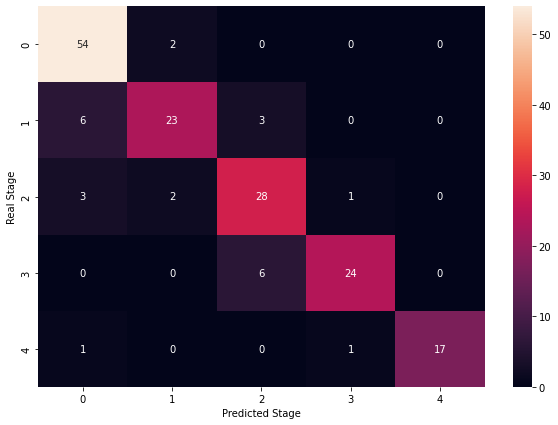

In [78]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

class_names = [0, 1, 2, 3, 4]  # Replace with your class names

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted Stage')
plt.ylabel('Real Stage')
plt.show()

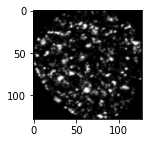

1/1 [==============================] - 0s 13ms/step
Predicted Label 3
True Label 3


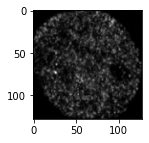

1/1 [==============================] - 0s 14ms/step
Predicted Label 0
True Label 0


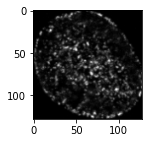

1/1 [==============================] - 0s 13ms/step
Predicted Label 2
True Label 2


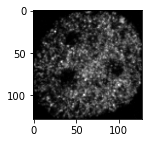

1/1 [==============================] - 0s 14ms/step
Predicted Label 0
True Label 0


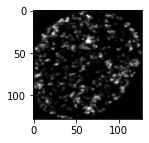

1/1 [==============================] - 0s 14ms/step
Predicted Label 2
True Label 2


In [79]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[12],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[12].reshape(1,128,128))))
print('True Label', np.argmax(y_test[12]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[18],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[18].reshape(1,128,128))))
print('True Label', np.argmax(y_test[18]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[21],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[21].reshape(1,128,128))))
print('True Label', np.argmax(y_test[21]))

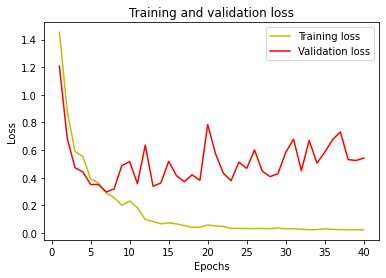

In [80]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

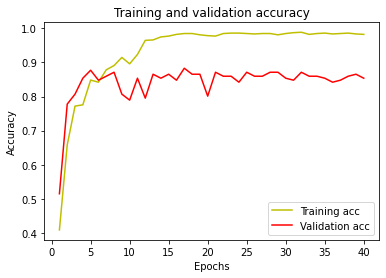

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()